# Exploratory Data Analysis
---

**Objective:** Understand the variables, association between them and necessary transformations before model selection/building.

**Process:**
1. Importing libraries and dataset
2. Checking data types, nulls and outliers
3. Univariate analysis (target)
4. Bivariate analysis (relation to target)
5. Multivariate analysis (multicollinearity)
---

## 1. Importing libraries and dataset

In [164]:
# Adding src to the path for modules
import sys
import os
root_path = os.path.abspath('..')
src_path = os.path.join(root_path, 'src')
sys.path.append(src_path)

# Data Manipulation
import pandas as pd
import numpy as np

# Hypothesis Testing
import scipy.stats as stats

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Project variables and functions
import config 
import utils
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\vsuar\\OneDrive\\Documentos\\IncomePrediction\\src\\utils.py'>

Importing the data and having a first look at it:

In [165]:
# Importing
df = utils.read_compressed_data(config.COLLECTED_DATA_PATH)

# First look
df.sample(10)

,state,age,sex,race,literate,highest_educational_level,years_studied,worker_type,work_segment,occupation_group,tax_payer,weekly_worked_hours,main_work_income,all_work_income,weekly_worked_hours_all_jobs
191833,PE,37,2,4,1,2,8,2,1,9,2,3,600.0,600.0,40
133821,MG,47,1,4,1,2,6,9,5,8,2,3,2000.0,2000.0,40
629708,SC,53,2,4,1,7,15,1,9,3,1,5,3000.0,6000.0,80
734177,RJ,51,2,4,1,7,16,7,8,2,1,3,7000.0,7000.0,40
122371,BA,35,1,1,1,2,6,2,1,6,2,2,400.0,400.0,32
528061,RS,35,1,1,1,5,12,1,3,3,1,3,2500.0,2500.0,44
365455,ES,26,1,1,1,5,12,9,1,6,2,3,1000.0,1000.0,44
16811,SP,33,1,4,1,1,0,1,2,4,1,3,2500.0,2500.0,44
417037,SP,47,1,1,1,5,12,7,5,4,1,3,2000.0,2000.0,40
195604,PI,19,1,2,1,2,8,2,4,7,2,3,1320.0,1320.0,44


---
## 2. Checking data types, nulls and outliers

Checking types:

In [3]:
# Types
df.dtypes

state                            object
age                               int64
sex                               int64
race                              int64
literate                          int64
highest_educational_level         int64
years_studied                     int64
worker_type                       int64
work_segment                      int64
occupation_group                  int64
tax_payer                         int64
weekly_worked_hours               int64
main_work_income                float64
all_work_income                 float64
weekly_worked_hours_all_jobs      int64
dtype: object

Although almost all columns are codified as numeric, most of them are truly categorical.    
The ones that are numeric should be stored in a separate variable.

In [4]:
truly_numeric = ['age', 'years_studied', 'main_work_income', 'all_work_income', 'weekly_worked_hours_all_jobs']

Checking nulls:

In [5]:
# Nulls
utils.nulls_percentage(df)

Nulls Percentage by Column: 


state                            0.00%
age                              0.00%
sex                              0.00%
race                             0.00%
literate                         0.00%
highest_educational_level        0.00%
years_studied                    0.00%
worker_type                      0.00%
work_segment                     0.00%
occupation_group                 0.00%
tax_payer                        0.00%
weekly_worked_hours              0.00%
main_work_income                 0.00%
all_work_income                  0.00%
weekly_worked_hours_all_jobs     0.00%
dtype: object

Checking outliers:

In [6]:
utils.outlier_percentage(df[truly_numeric])

Percentage of Outliers per Column: 


,Inner Fence,Outer Fence
age,0.07%,0.00%
years_studied,3.08%,0.00%
main_work_income,8.49%,5.36%
all_work_income,8.79%,4.76%
weekly_worked_hours_all_jobs,16.58%,4.60%


As expected, the inner fence method is way more sensitive to outliers than the outer fence.     
Thus, outer fence can keep roughly 95% of the dataset as it is, while it separates inliers and outliers.   
This probably will be the preferred method, but I'll inspect the details before I formalize my decision.

In [7]:
utils.formatted_description(df[truly_numeric])

,age,years_studied,main_work_income,all_work_income,weekly_worked_hours_all_jobs
mean,40.9,10.8,2636.1,2713.0,39.3
std,13.6,4.3,3941.1,4138.2,12.0
min,14.0,0.0,5.0,5.0,1.0
25%,30.0,8.0,1300.0,1302.0,36.0
50%,40.0,12.0,1600.0,1600.0,40.0
75%,51.0,13.0,2900.0,3000.0,44.0
max,114.0,16.0,300000.0,300000.0,120.0


Curious outliers:
- Ages >= 100 (yet, they may happen, depending on how often)  
- People who have never studied at all (yet this not really strange to Brazilian reality)
- low income < 1300 or around 300k (people receiving way below minimum age or much more than 100x the averages)
- people who are working too little (1h/week) or too much (120h/week!!!)
    - if a person works 120h/week, he/she must work more than 5 days a week (for 120/5 = 24).
        - working 6 days, there would be 20 working hours a day
        - working 7 days, approximately 17 working hours a day
    - I can imagine few people working that much for a short period in their lives, but definitively I'll take a look at this later

For now, I'll simply conduct univariate analysis on the target variable, dealing with outliers without removing any row.

----
## 3. Univariate Analysis (Target)

Checking how often the main work income corresponds to all work income: 

In [8]:
main_is_all = df.loc[df['main_work_income']==df['all_work_income']].shape[0] / df.shape[0]
print('Porportion of rows where main income represents all income:', utils.make_percentage(main_is_all))

Porportion of rows where main income represents all income:  96.99%


Treating outliers without removing them:

In [166]:
print(f"Before Winsorization:\n Max: {df['all_work_income'].max()}\n Central Measurements:\n {utils.central_measurements(df['all_work_income'])}")
print('---'*10)
df['all_work_income'] = utils.winsorizing_outliers(df['all_work_income'])
print(f"After Winsorization:\n Max: {df['all_work_income'].max()}\n Central Measurements:\n {utils.central_measurements(df['all_work_income'])}")

Before Winsorization:
 Max: 300000.0
 Central Measurements:
 mode      1320.000000
median    1600.000000
mean      2713.003403
dtype: float64
------------------------------
After Winsorization:
 Max: 8094.0
 Central Measurements:
 mode      1320.000000
median    1600.000000
mean      2345.570765
dtype: float64


Analyzing income distribution graphically:

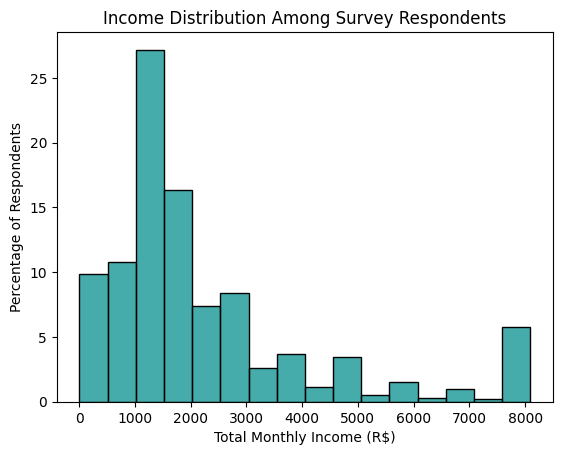

In [10]:
utils.plot_histogram(
    df['all_work_income'], 
    title= 'Income Distribution Among Survey Respondents', 
    y_label='Percentage of Respondents', 
    x_label='Total Monthly Income (R$)',
)

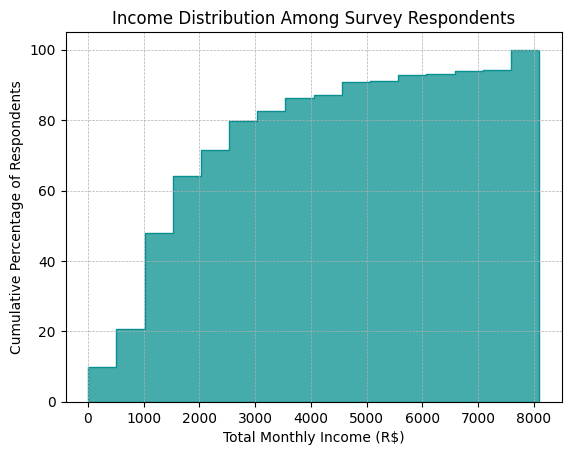

In [11]:
utils.plot_histogram(
    df['all_work_income'], 
    title= 'Income Distribution Among Survey Respondents', 
    y_label='Cumulative Percentage of Respondents', 
    x_label='Total Monthly Income (R$)',
    cumulative=True,
    element='step'
)

Checking conformity with normality:

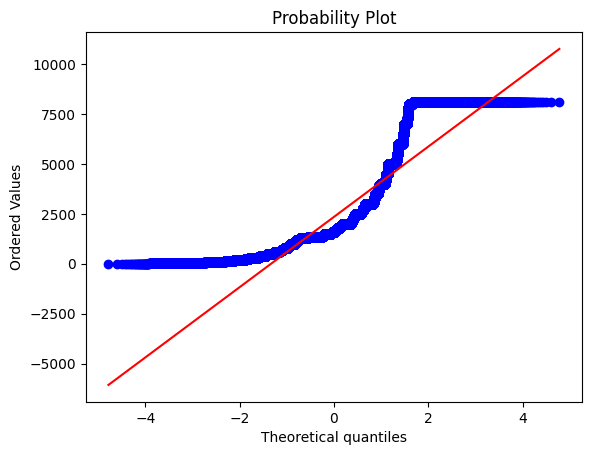

In [12]:
utils.check_normality(df['all_work_income'])

Since income distribution is far from normality, as expected, I'll opt for non-parametric approaches for the rest of the process.   
____

## 4. Bivariate Analysis (relation to target)

Analyzing association between **geography** and income:

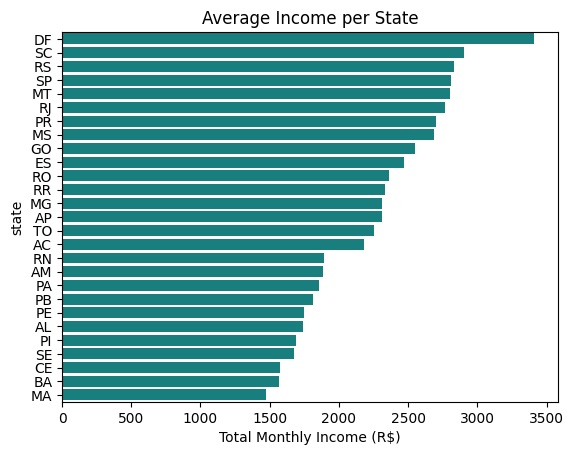

In [167]:
# Obtaining the average income per state
avg_income_state = utils.mean_per_group(df = df, group_by = 'state', mean_column = 'all_work_income')

# Plotting barchart
utils.show_barplot(avg_income_state.index, avg_income_state, title='Average Income per State')


Were those results statistically significant?

In [132]:
utils.test_multiple_means(avg_income_state)

Can't reject the null
 p-value was:  0.46310474709968075


c:\Users\vsuar\OneDrive\Documentos\IncomePrediction\venv\lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


False

In [168]:
# Creating new features related to geography
df['state_avg_salary'] = df['state'].map(avg_income_state)
df['region'] = df['state'].map(utils.return_region)

Repeting previous steps, but now for region:

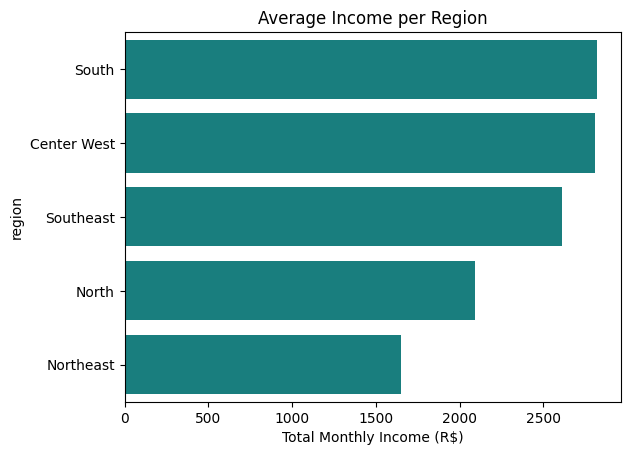

Were results significant?
Can't reject the null
 p-value was:  0.40600584970983794


c:\Users\vsuar\OneDrive\Documentos\IncomePrediction\venv\lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


False

In [169]:
# Obtaining the average income per state
avg_income_region = utils.mean_per_group(df = df, group_by = 'region', mean_column = 'all_work_income')

# Plotting barchart
utils.show_barplot(avg_income_region.index, avg_income_region, title='Average Income per Region')

# Testing significance
print('Were results significant?')
utils.test_multiple_means(avg_income_region)

In [170]:
# Factorizing State and Region
df['region_avg_salary'] = df['region'].map(avg_income_region)
df['state'] = utils.factorize_column(avg_income_state, df['state_avg_salary'])
df['region'] = utils.factorize_column(avg_income_region, df['region_avg_salary'])

# Adding New Feature
df['state - region'] = df['state_avg_salary'] - df['region_avg_salary']

In [173]:
state_features = ['state', 'region', 'region_avg_salary', 'state_avg_salary', 'state - region']
df[state_features]

,state,region,region_avg_salary,state_avg_salary,state - region
0,16,4,2092.382663,2184.495580,92.112918
1,16,4,2092.382663,2184.495580,92.112918
2,16,4,2092.382663,2184.495580,92.112918
3,16,4,2092.382663,2184.495580,92.112918
4,16,4,2092.382663,2184.495580,92.112918
...,...,...,...,...,...
794502,17,5,1648.324395,1894.558554,246.234159
794503,17,5,1648.324395,1894.558554,246.234159
794504,17,5,1648.324395,1894.558554,246.234159
794505,17,5,1648.324395,1894.558554,246.234159


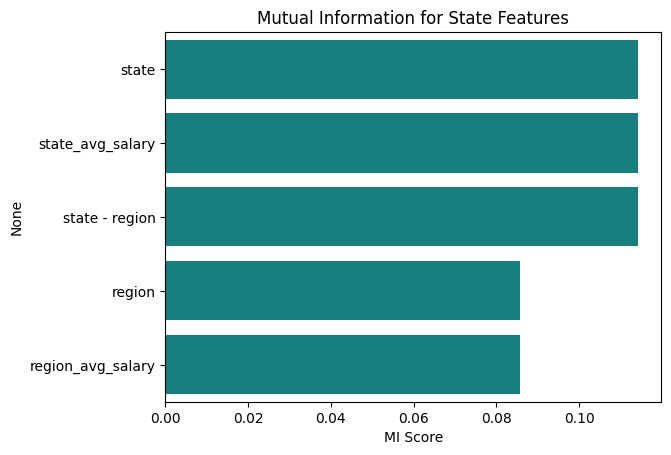

In [174]:
# Checking mi for state features
# Getting mutual information for each feature
mi = utils.mutual_information(
    X=df[state_features],
    y=df['all_work_income'],
    discrete_features = True
)

# Plotting 
utils.show_barplot(
    cat = mi.index,
    values = mi,
    title = 'Mutual Information for State Features',
    x_label = 'MI Score'
)

In [178]:
df.columns

Index(['state', 'age', 'sex', 'race', 'literate', 'highest_educational_level',
       'years_studied', 'worker_type', 'work_segment', 'occupation_group',
       'tax_payer', 'weekly_worked_hours', 'main_work_income',
       'all_work_income', 'weekly_worked_hours_all_jobs', 'state_avg_salary',
       'region', 'region_avg_salary', 'state - region'],
      dtype='object')

Comparing state features so far with all other features:

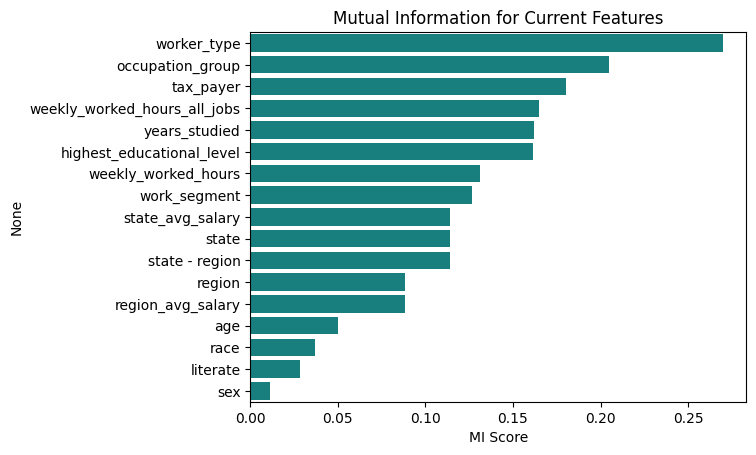

In [180]:
# Excluding income variables from the features
features = [col for col in df.columns if 'income' not in col]

# Getting mutual information for each feature
mi = utils.mutual_information(
    X=df[features],
    y=df['all_work_income'],
    discrete_features = [True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True]
)

# Plotting 
utils.show_barplot(
    cat = mi.index,
    values = mi,
    title = 'Mutual Information for Current Features',
    x_label = 'MI Score'
)

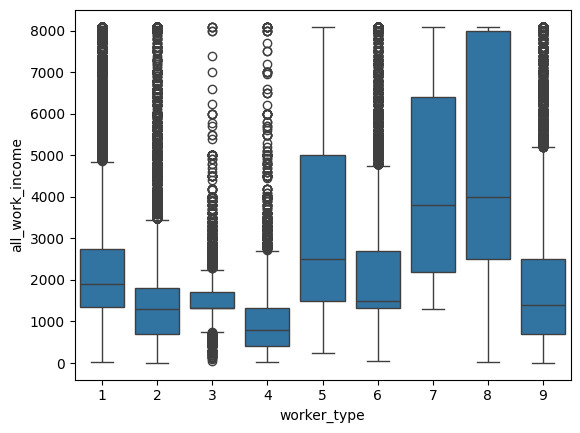

In [181]:
sns.boxplot(data=df, x='worker_type', y='all_work_income')
plt.show()